# Continuous Function Approximater

> A single hidden layer neural network with a linear output unit can approximate any continuous function arbitrarily well, given enough hidden units.

This IPython notebook walks through the anatomy of a feed-forward neural network written in Tensorflow with (purposely) a single hidden layer, and demonstrates how well or poorly the said neural network approximates some function.

In [194]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

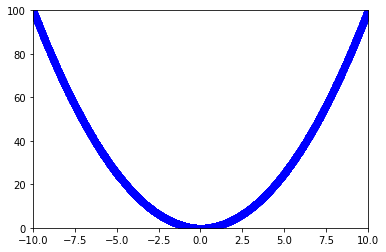

In [195]:
# Tweak the values below
n_train = 5000
train_min = -10.
train_max = 10.
n_hidden_units = 200
learning_rate = 0.008
num_steps = 801

def func_to_approximate(X):
    return np.square(X)

# Sanity check
assert n_train > 0
assert n_validate > 0
assert train_max > train_min

# Generate training data
X_train = np.random.random_sample((n_train, 1)) * (train_max - train_min) + train_min
y_train = func_to_approximate(X_train)

# Plot training data
plt.figure()
plt.axis([train_min, train_max, min(y_train), max(y_train)])
plt.plot(X_train, y_train, 'bo')
plt.show()

In [196]:
X_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='X_placeholder')
y_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='y_placeholder')

h_weights = tf.Variable(
    tf.truncated_normal([1, n_hidden_units]),
    name='h_weights')
h_biases = tf.Variable(tf.zeros([n_hidden_units]),
                       name='h_biases')

out_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units, 1]),
    name='out_weights')
out_biases = tf.Variable(tf.zeros([1]),
                         name='out_biases')

In [197]:
hidden = tf.nn.sigmoid(tf.matmul(X_placeholder, h_weights) + h_biases)
y = tf.matmul(hidden, out_weights) + out_biases

In [198]:
loss = tf.reduce_mean(tf.square(y - y_placeholder))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

step 0 loss 1434.04
y_train [ 31.73759594] y_trained [ 11.14495277]


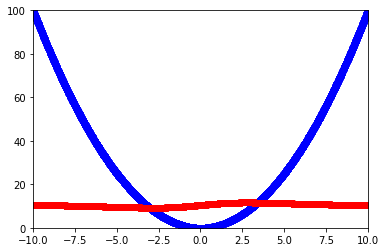

step 40 loss 341.886
y_train [ 31.73759594] y_trained [ 39.94271851]


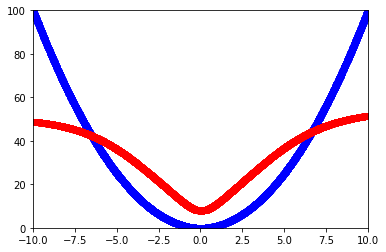

step 80 loss 205.922
y_train [ 31.73759594] y_trained [ 47.82212067]


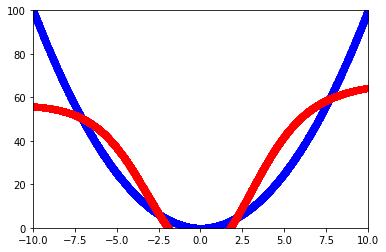

step 120 loss 197.176
y_train [ 31.73759594] y_trained [ 56.17723083]


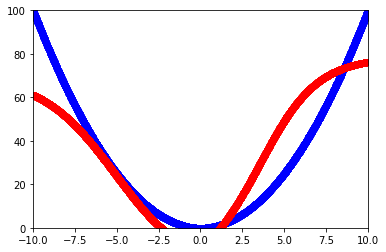

step 160 loss 185.597
y_train [ 31.73759594] y_trained [ 56.2182312]


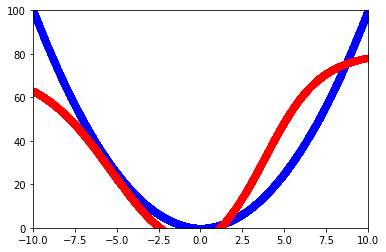

step 200 loss 167.994
y_train [ 31.73759594] y_trained [ 55.26044464]


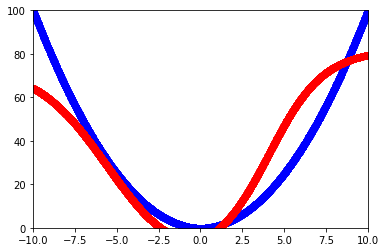

step 240 loss 152.417
y_train [ 31.73759594] y_trained [ 54.21764374]


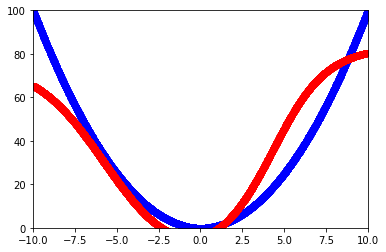

step 280 loss 139.117
y_train [ 31.73759594] y_trained [ 53.17803574]


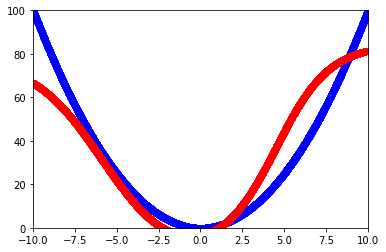

step 320 loss 127.691
y_train [ 31.73759594] y_trained [ 52.16041565]


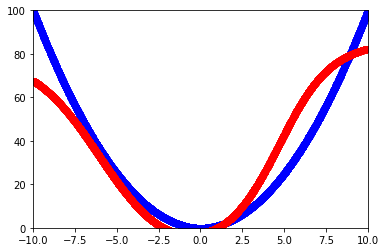

step 360 loss 117.808
y_train [ 31.73759594] y_trained [ 51.17956543]


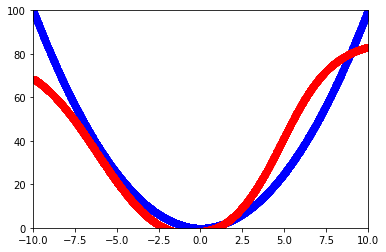

step 400 loss 109.252
y_train [ 31.73759594] y_trained [ 50.24266434]


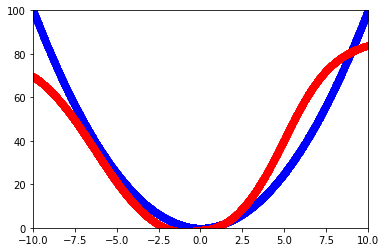

step 440 loss 101.801
y_train [ 31.73759594] y_trained [ 49.34591293]


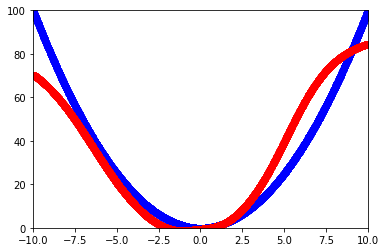

step 480 loss 95.2655
y_train [ 31.73759594] y_trained [ 48.48966599]


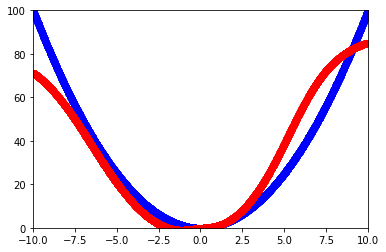

step 520 loss 89.4991
y_train [ 31.73759594] y_trained [ 47.67748642]


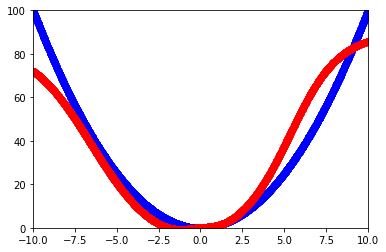

step 560 loss 84.3813
y_train [ 31.73759594] y_trained [ 46.9112854]


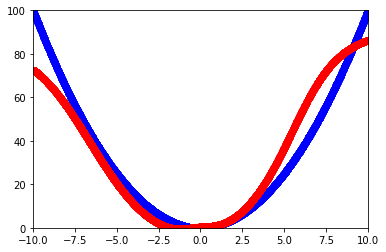

step 600 loss 79.8099
y_train [ 31.73759594] y_trained [ 46.19048691]


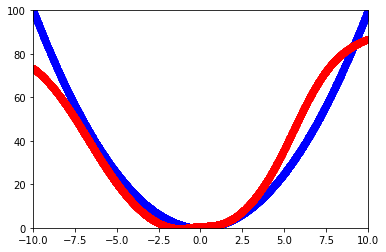

step 640 loss 75.6966
y_train [ 31.73759594] y_trained [ 45.51297379]


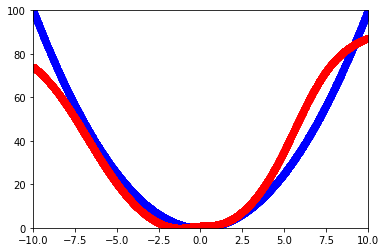

step 680 loss 71.97
y_train [ 31.73759594] y_trained [ 44.87699509]


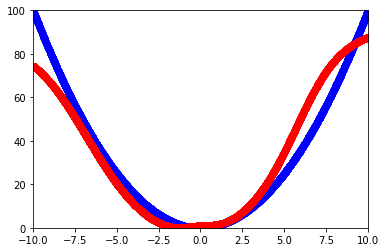

step 720 loss 68.5726
y_train [ 31.73759594] y_trained [ 44.28064346]


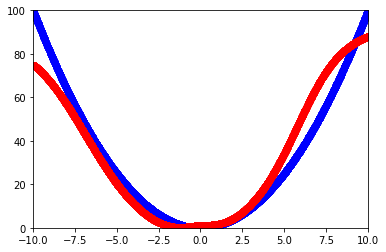

step 760 loss 65.4589
y_train [ 31.73759594] y_trained [ 43.72208023]


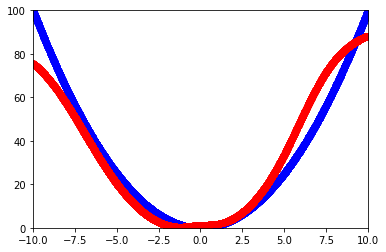

step 800 loss 62.5929
y_train [ 31.73759594] y_trained [ 43.20025635]


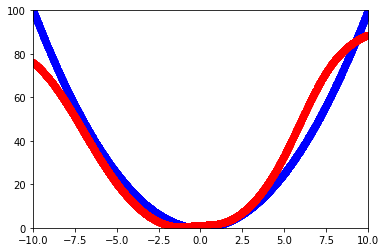

In [199]:
with tf.Session() as session:
    tf.global_variables_initializer().run()

    for step in range(num_steps):
        feed_dict_train = {X_placeholder: X_train, y_placeholder : y_train}
        _, loss_trained, y_trained = session.run([train, loss, y], feed_dict=feed_dict_train)
        
        if step % 40 == 0:
            print('step', step, 'loss', loss_trained)
            print('y_train', y_train[0], 'y_trained', y_trained[0])
            plt.figure()
            plt.axis([train_min, train_max, min(y_train), max(y_train)])
            plt.plot(X_train, y_train, 'bo')
            plt.plot(X_train, y_trained, 'ro')
            plt.show()
            print('================')